## **Data Telco Customer Churn**

>## **Latar Belakang**

Sebuah perusahaan Telekomunikasi, ingin memahami perilaku pelanggan dengan menganalisis karakteristik pelanggan yang akan meninggalkan layanan telekomunikasi dan yang tetap menggunakan layanan. Tujuan analisis dilakukan agar perusahaan dapat melakukan tindakan agar pelanggan nyaman menggunakan platform.

Churn :

0 : Tidak meninggalkan layanan telekomunikasi

1 : Berhenti berlangganan layanan telekominikasi

**Problem Statement :**

Proses promosi dapat memakan biaya apabila perusahaan memberikan promosi pada keseluruhan pelanggan. perusahaan harus meningkatkan efisiensi promosi dan mengetahui pelanggan mana yang telah berhenti berlangganan, sehingga dapat diberikan promo agar pelanggan yang berhenti berlangganan dapat kembali berlangganan.

Apabila promosi diberikan secara cuma-cuma ke seluruh pelanggan, maka keuntungan perusahaan akan menurun dan menjadi sia-sia apabila pelanggan yang setia berlangganan dan tidak ada kendala sama sekali terhadap layanan yang sudah diberikan. 

**Goals :**

Berdasarkan permasalahan yang ada, perusahaan berusaha untuk memprediksi kemungkinan pelanggan yang akan berhenti berlangganan atau tidak, sehingga dapat memfokuskan promosi pada pelanggan yang berhenti berlangganan untuk dapat kembali berlangganan. 

Selain itu juga, perusahaan ingin mengetahui faktor atau variabel apa yang membuat pelanggan berhenti berlangganan atau tetap berlangganan, sehingga perusahaan dapat membuat rencana kedepannya untuk mempertahankan pelanggan agar tetap berlangganan layanan telekomunikasi. 


**Analytic Approach :**

Pendekatan analisis yang akan dilakukan adalah dengan menganalisis data untuk menemukan pola terbaik yang dapat membedakan pelanggan mana yang tetap berlangganan dan yang tidak berlangganan. Kemudian akan dibangun model machine learning yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan berlangganan atau berhenti berlangganan. 

### Keterangan Masing-Masing Feature:

-	**Dependents**: Whether the customer has dependents or not.
-	**Tenure**: Number of months the customer has stayed with the company.
-	**OnlineSecurity**: Whether the customer has online security or not.
-	**OnlineBackup**: Whether the customer has online backup or not.
-	**InternetService**: Whether the client is subscribed to Internet service.
-	**DeviceProtection**: Whether the client has device protection or not.
-	**TechSupport**: Whether the client has tech support or not 
-	**Contract**: Type of contract according to duration.
-	**PaperlessBilling**: Bills issued in paperless form.
-	**MonthlyCharges**: Amount of charge for service on monthly bases.
-	**Churn**: Whether the customer churns or not.




In [111]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score 
# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [56]:
df = pd.read_csv('data_telco_customer_churn.csv')

In [57]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [58]:
df.shape

(4930, 11)

In [59]:
print(f'Jumlah baris dan kolom di dataset Telco Customer Churn.csv adalah {df.shape[1]} kolom dan {df.shape[0]} baris')
df.info()

Jumlah baris dan kolom di dataset Telco Customer Churn.csv adalah 11 kolom dan 4930 baris
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [60]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [61]:
display(df.describe(),
df.describe(include='object'))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


>## **EDA**

array([[<AxesSubplot: title={'center': 'tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharges'}>]], dtype=object)

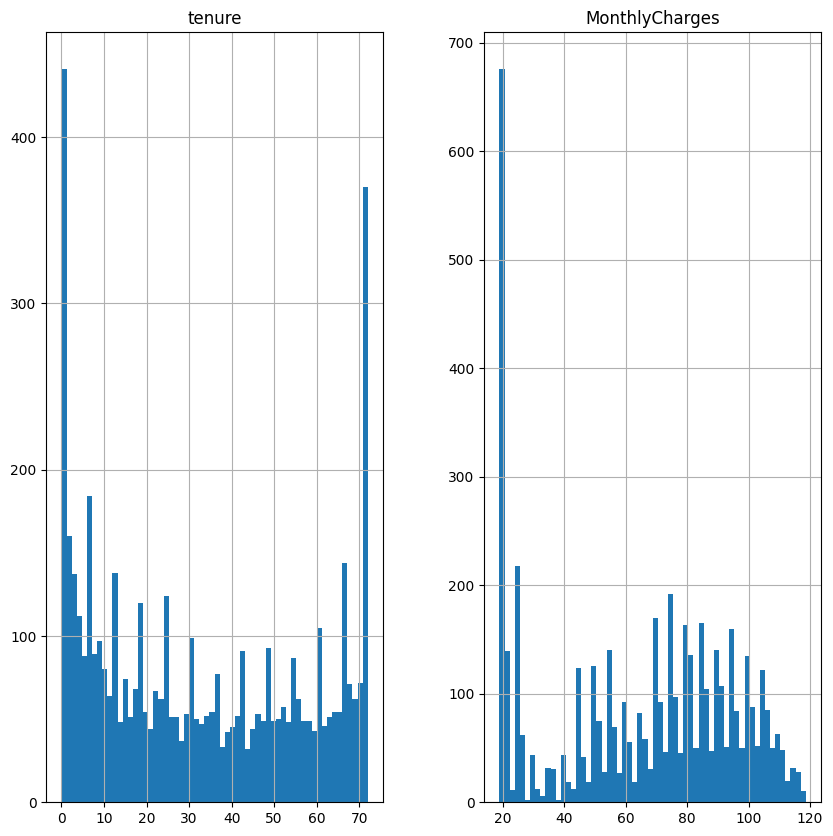

In [62]:
# Cek distribusi data
df.hist(bins=60,figsize=(10,10))

Berdasarkan distribusi data, terlihat bahwa tenure dan MonthlyCharges memiliki distribusi yang tidak merata. dimana dalam kasus linear regression, data yang tidak terdistribusi normal akan mempengaruhi keakuratan dari model, sehingga features yang terdistribusi tidak normal perlu diubah dengan skala logaritmic power transformer, agar distribusinya mendekati normal.

<AxesSubplot: >

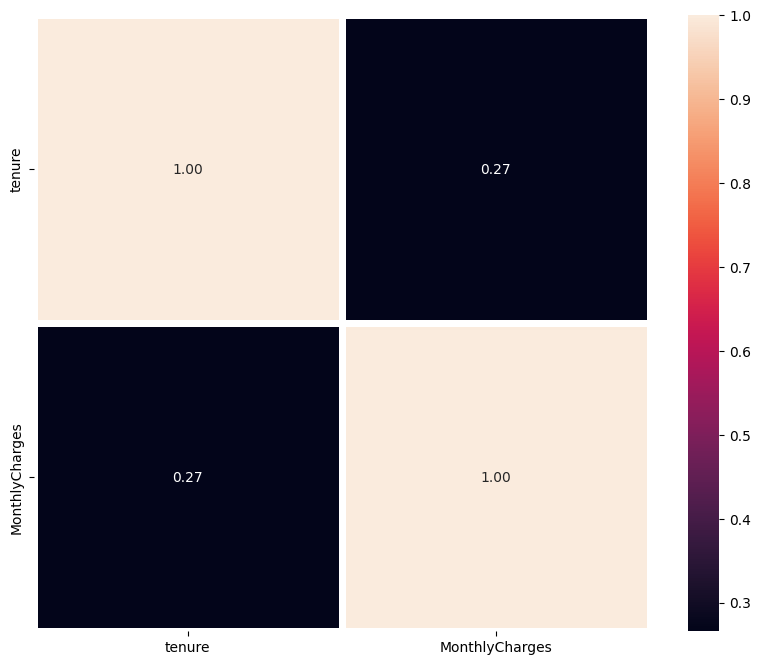

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr('spearman'),annot=True,square=True,linewidths=5,fmt='.2f')

terlihat dari koefisien korelasi menunjukan tingkat churn cenderung meningkat apabila MonthlyCharges meningkat.

<AxesSubplot: >

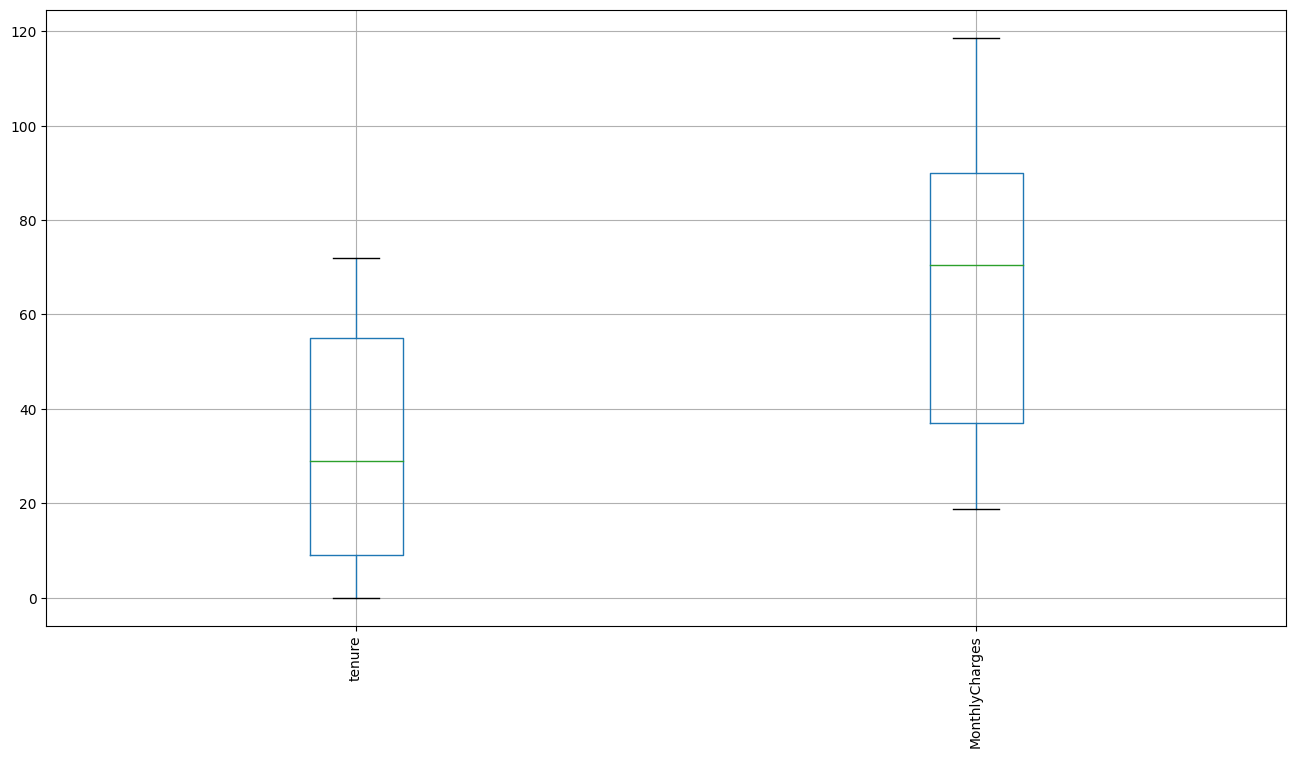

In [64]:
plt.figure(figsize=(16,8))
df.boxplot(rot=90)

darigraphic diatas terlibah bahwa data tidak memiliki data outlier

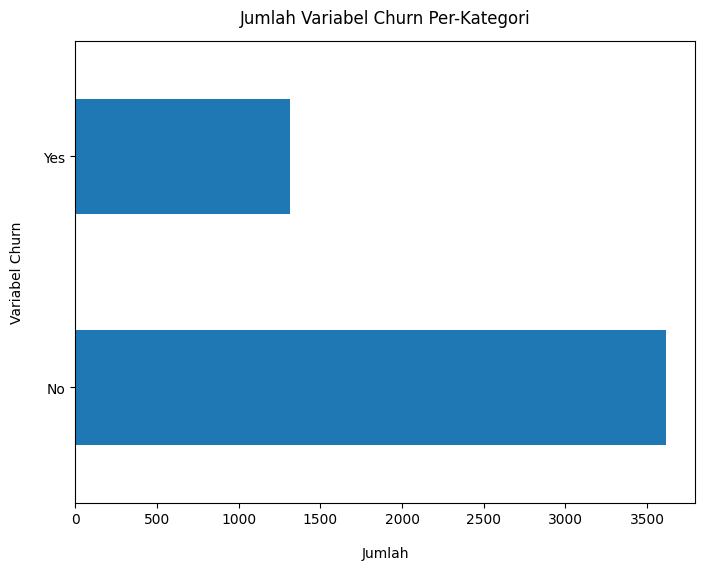

In [65]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Jumlah", labelpad=14)
plt.ylabel("Variabel Churn", labelpad=14)
plt.title("Jumlah Variabel Churn Per-Kategori", y=1.02);


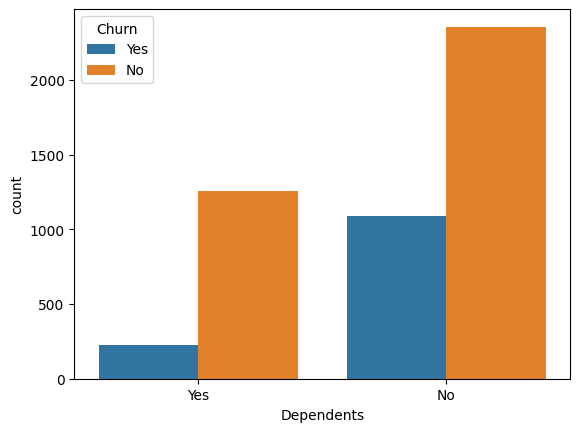

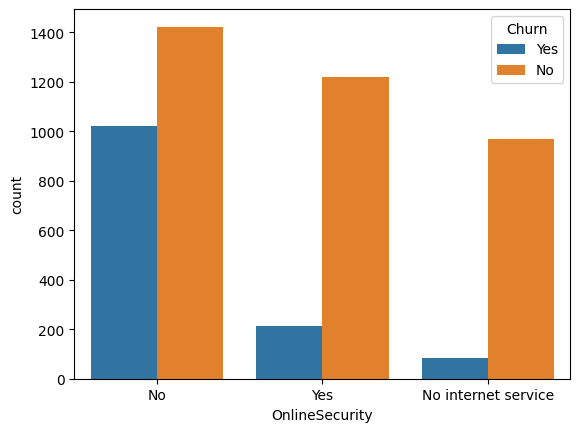

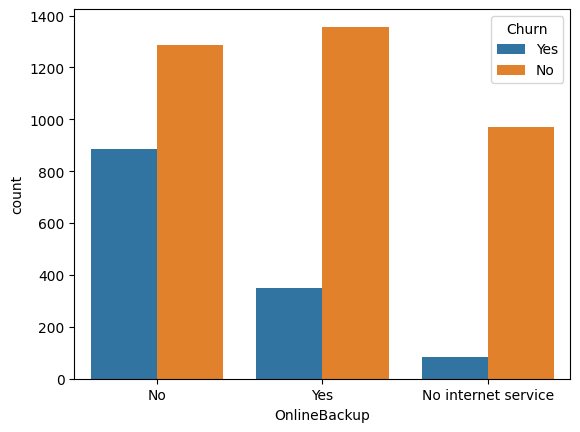

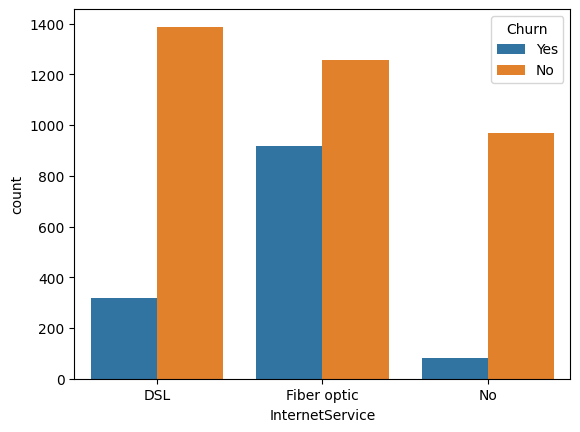

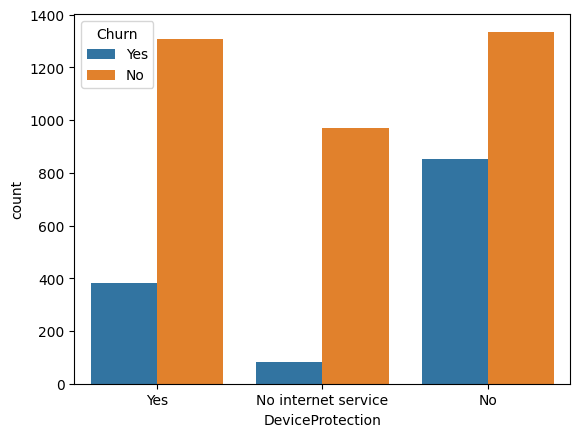

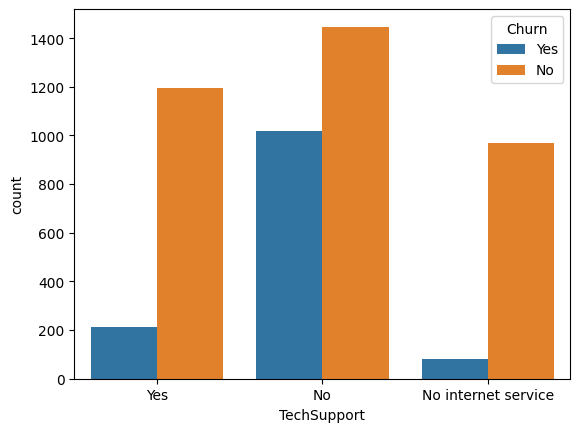

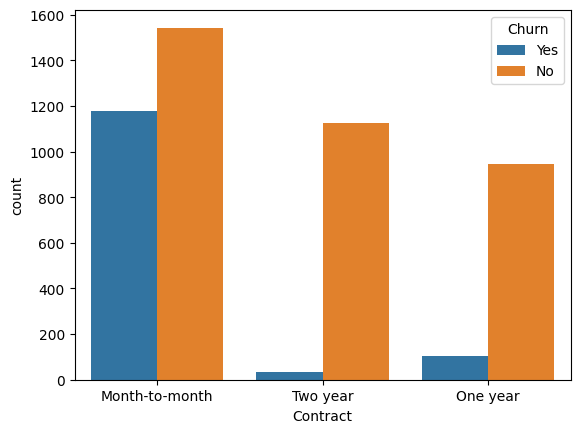

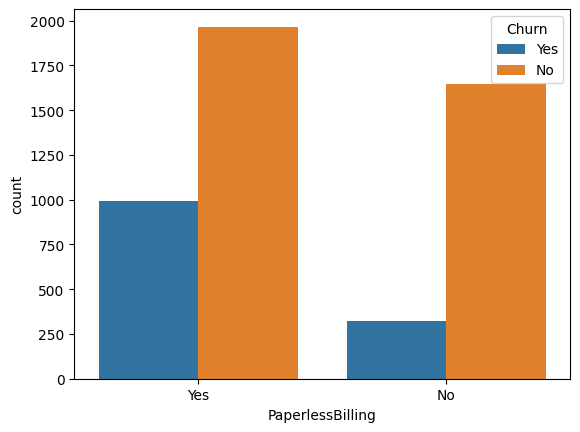

In [66]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'tenure', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

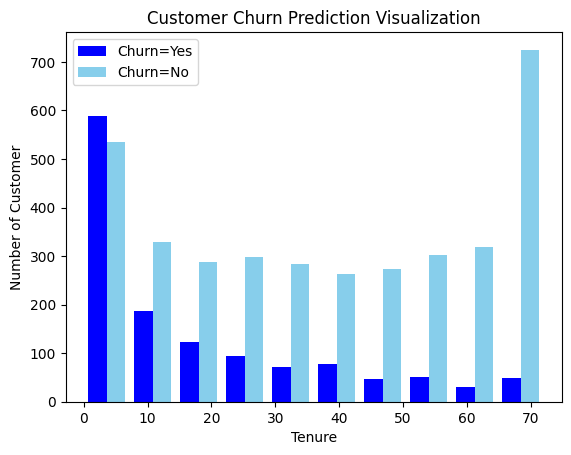

In [67]:
churn_tenure_no = df[df.Churn == 'No'].tenure
churn_tenure_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([churn_tenure_yes, churn_tenure_no], color = ['Blue', 'Skyblue'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

Text(0.5, 1.0, 'Tingkat Churn Berdasarkan Tenure')

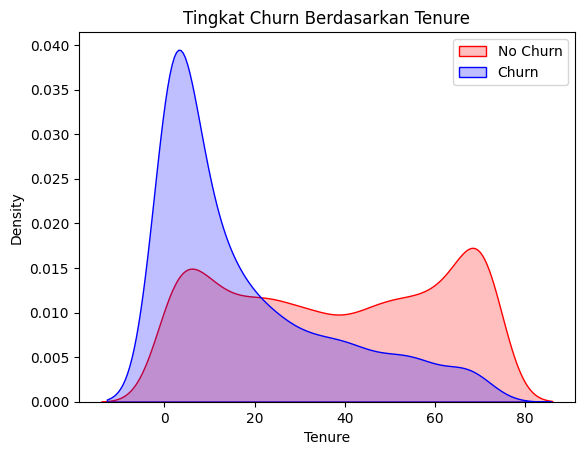

In [68]:
Tenure_kdeplot = sns.kdeplot(df.tenure[(df["Churn"] == 'No')],
                color="Red", shade = True)
Tenure_kdeplot = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =Tenure_kdeplot, color="Blue", shade= True)
Tenure_kdeplot.legend(["No Churn","Churn"],loc='upper right')
Tenure_kdeplot.set_ylabel('Density')
Tenure_kdeplot.set_xlabel('Tenure')
Tenure_kdeplot.set_title('Tingkat Churn Berdasarkan Tenure')

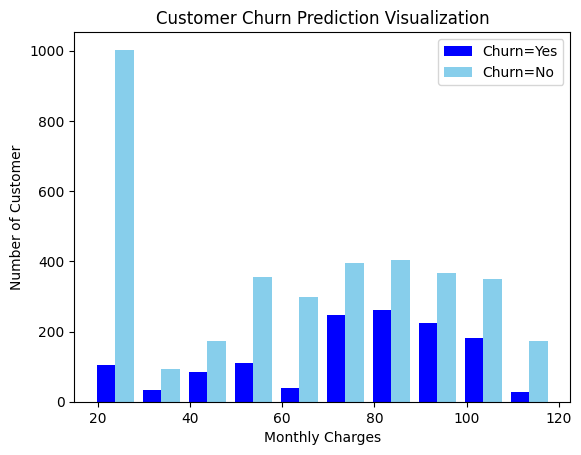

In [69]:
charges_tenure_no = df[df.Churn == 'No'].MonthlyCharges
charges_tenure_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([charges_tenure_yes, charges_tenure_no], color = ['Blue', 'Skyblue'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

Text(0.5, 1.0, 'Tingkat Churn Berdasarkan Monthly Charges')

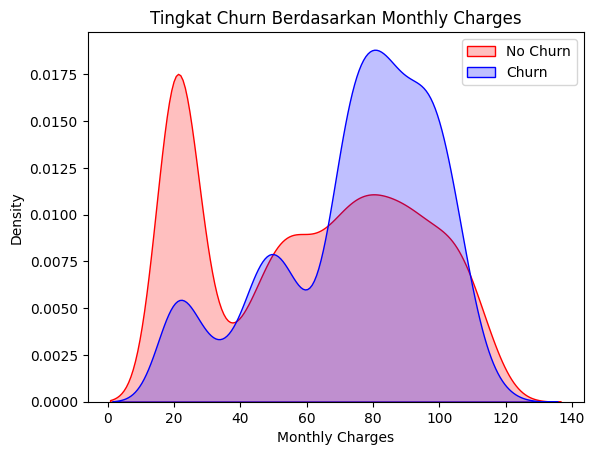

In [70]:
MonthlyCharges_kdeplot = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
MonthlyCharges_kdeplot = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =MonthlyCharges_kdeplot, color="Blue", shade= True)
MonthlyCharges_kdeplot.legend(["No Churn","Churn"],loc='upper right')
MonthlyCharges_kdeplot.set_ylabel('Density')
MonthlyCharges_kdeplot.set_xlabel('Monthly Charges')
MonthlyCharges_kdeplot.set_title('Tingkat Churn Berdasarkan Monthly Charges')

In [71]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [72]:
df['Churn'].value_counts()

0    3614
1    1316
Name: Churn, dtype: int64

In [73]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,Churn,Dependents_No,Dependents_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,9,72.90,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
1,14,82.65,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1
2,64,47.85,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0
3,72,69.65,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0
4,3,23.60,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1


<AxesSubplot: >

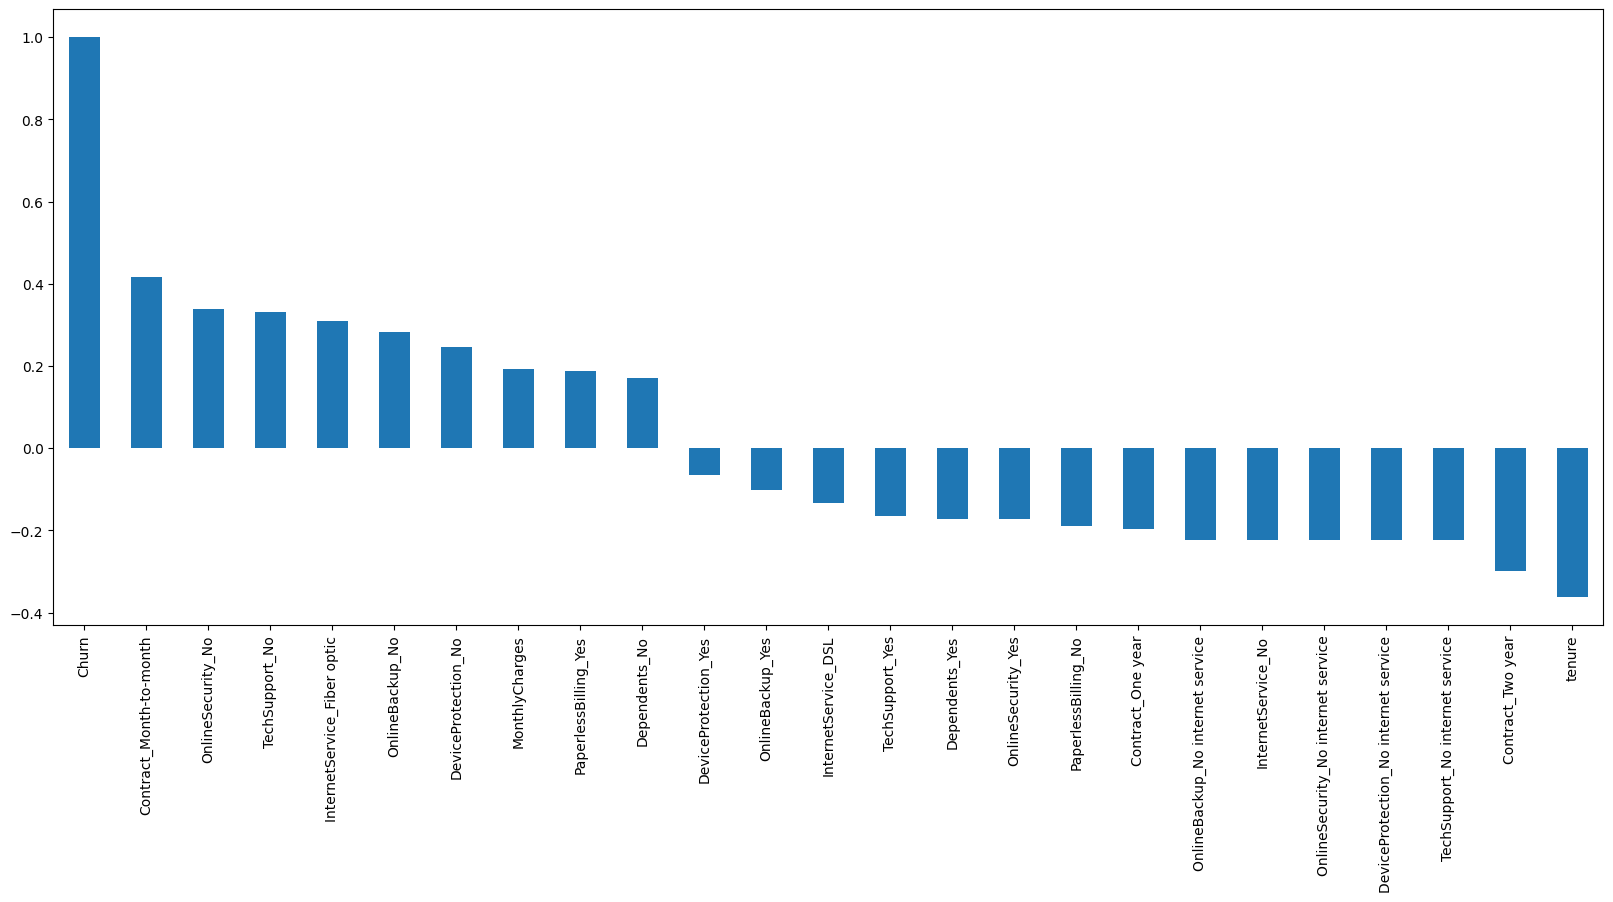

In [74]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


### **Summary**
**1. Ciri-ciri pelanggan yang cenderung untuk meninggalkan layanan / Churn dan yang tidak**
- Secara umum **tinggi-nya Churn** pada pelanggan terjadi paling sering pada pelanggan yang berlanggananan **`Month-to-month`**, tidak menggunakan layanan Online Security (**`OnlineSecurity_No`**), tidak menggunakan layanan Tech Support (**`TechSupport_No`**), dan menggunakan internet service Fiber Optics (**`InternetService_Fiber optic`**), sedangkan **rendah-nya Churn** terjadi pada pelanggan yang **`berlangganan 2 tahun`** atau long-term subscriptions dan berlangganan tanpa Internet Service (**`No Internet Service`**). 

**2. Informasi yang didapatkan pada hasil Visualisasi KDE Plot, didapatkan bahwa:**
- **Tenure Vs Churn** : Pelanggan dengan `tenure lebih tinggi` atau lebih dari 40 bulan `cenderung lebih sedikit untuk meninggalkan platform`, atau dengan kata lain, semakin lama pelanggan berlangganan, maka sedikit juga kemungkinan untuk berhenti berlangganan.
- **Monthly Charges Vs Churn** : `Monthly Charges` yang `tinggi cenderung membuat pelanggan mudah berhenti berlangganan`, atau dengan kata lain, semakin tinggi Monthly Charge yang diberikan pada pelanggan, maka semakin tinggi juga tingkat Churn-nya

>## **Data Preparation** 

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [76]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df2 = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'unique', 'uniqueSample'],
                     data=listItem)
df2

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[60, 51]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, No]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, No]"
4,InternetService,object,0,0.0,3,"[Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[No internet service, Yes]"
6,TechSupport,object,0,0.0,3,"[No internet service, No]"
7,Contract,object,0,0.0,3,"[Month-to-month, One year]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[40.05, 82.45]"


In [77]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
    'OnlineSecurity', 
    'OnlineBackup', 
    'InternetService', 
    'DeviceProtection', 
    'TechSupport', 
    'Contract', 
    'Dependents', 
    'PaperlessBilling',
    'Churn' ]

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [78]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df2 = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'unique', 'uniqueSample'],
                     data=listItem)
df2

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,Dependents,int32,0,0.0,2,"[1, 0]"
1,tenure,int64,0,0.0,73,"[20, 24]"
2,OnlineSecurity,int32,0,0.0,3,"[1, 2]"
3,OnlineBackup,int32,0,0.0,3,"[0, 1]"
4,InternetService,int32,0,0.0,3,"[1, 2]"
5,DeviceProtection,int32,0,0.0,3,"[0, 1]"
6,TechSupport,int32,0,0.0,3,"[1, 0]"
7,Contract,int32,0,0.0,3,"[2, 1]"
8,PaperlessBilling,int32,0,0.0,2,"[1, 0]"
9,MonthlyCharges,float64,0,0.0,1422,"[102.55, 111.9]"


array([[<AxesSubplot: title={'center': 'Dependents'}>,
        <AxesSubplot: title={'center': 'tenure'}>,
        <AxesSubplot: title={'center': 'OnlineSecurity'}>],
       [<AxesSubplot: title={'center': 'OnlineBackup'}>,
        <AxesSubplot: title={'center': 'InternetService'}>,
        <AxesSubplot: title={'center': 'DeviceProtection'}>],
       [<AxesSubplot: title={'center': 'TechSupport'}>,
        <AxesSubplot: title={'center': 'Contract'}>,
        <AxesSubplot: title={'center': 'PaperlessBilling'}>],
       [<AxesSubplot: title={'center': 'MonthlyCharges'}>,
        <AxesSubplot: title={'center': 'Churn'}>, <AxesSubplot: >]],
      dtype=object)

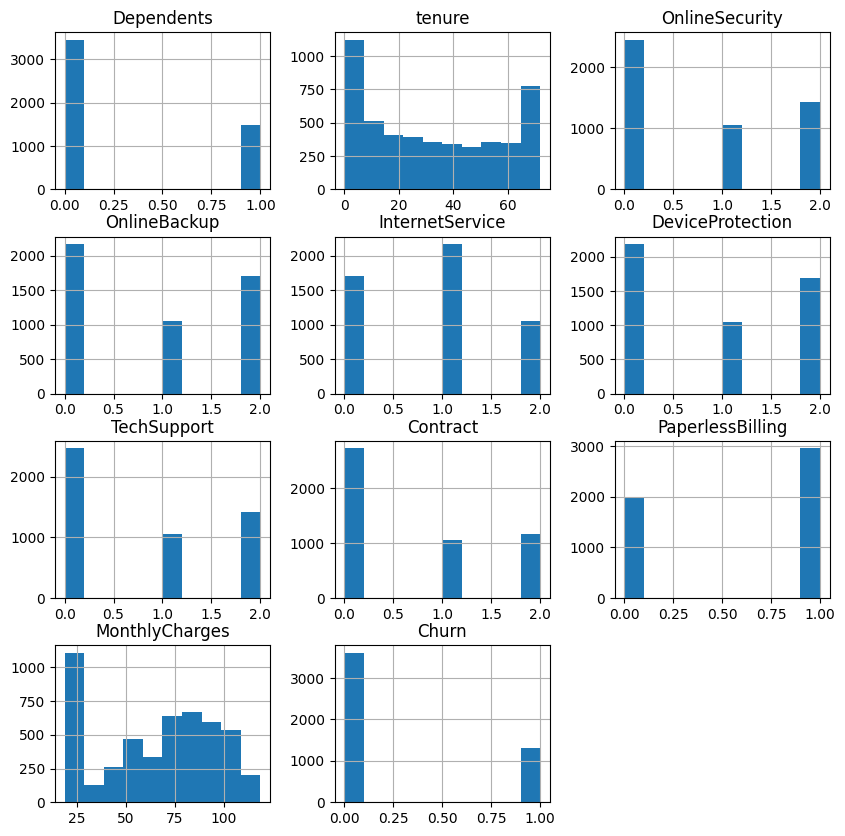

In [79]:
df.hist(figsize=(10,10))

In [80]:
# Handling Imbalanced data
df['Churn'].value_counts()/df.shape[0]*100

0    73.306288
1    26.693712
Name: Churn, dtype: float64

In [81]:
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,9,0,0,0,2,2,0,1,72.90,1
1,0,14,0,2,1,2,0,0,1,82.65,0
2,0,64,2,0,0,2,2,2,0,47.85,1
3,0,72,2,2,0,2,2,2,0,69.65,0
4,0,3,1,1,2,1,1,0,1,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,0,15,0,0,1,2,2,0,1,103.45,0
4926,1,10,0,0,1,2,2,0,1,91.10,0
4927,0,58,1,1,2,1,1,2,0,20.75,0
4928,0,1,0,0,1,0,0,0,1,69.75,1


Terlihat bahwa data yang kita miliki adalah data yang imbalance, sehingga perlu dilakukan balancing data menggunakan metode SMOTE()

In [82]:
# data splitting
x = df.drop(columns=['Churn'])
y = df['Churn']

In [83]:
# untuk Hyperparameter tunning
x_train,x_test,y_train,y_test= train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2023)


In [84]:
# mengubah kolom tenure dan monthlycharges menggunakan min_max() scaller untuk mendapatkan angka range 0-1
x_train[['tenure', 'MonthlyCharges']]

,tenure,MonthlyCharges
3536,17,80.85
2277,56,52.70
417,64,19.55
4806,12,81.70
4587,8,20.15
...,...,...
2412,1,84.60
659,4,19.75
4109,3,80.00
3608,10,75.05


In [85]:
# mengubah kolom tenure dan monthlycharges menggunakan MinMaxScaller untuk mendapatkan angka range 0-1
scaler = MinMaxScaler()
train_scaler = np.array(x_train[['tenure']]).reshape(-1,1)
scaler_fit = scaler.fit(train_scaler)
x_train[['tenure']] = scaler_fit.transform(train_scaler)
test_scaler = np.array(x_test[['tenure']]).reshape(-1,1)
x_test[['tenure']] = scaler_fit.transform(test_scaler)


train_scaler = np.array(x_train[['MonthlyCharges']]).reshape(-1,1)
scaler_fit = scaler.fit(train_scaler)
x_train[['MonthlyCharges']] = scaler_fit.transform(train_scaler)
test_scaler = np.array(x_test[['MonthlyCharges']]).reshape(-1,1)
x_test[['MonthlyCharges']] = scaler_fit.transform(test_scaler)

In [86]:
x_train

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
3536,1,0.236111,0,0,1,0,0,0,0,0.621432
2277,0,0.777778,2,0,0,2,0,1,0,0.339509
417,0,0.888889,1,1,2,1,1,2,0,0.007511
4806,0,0.166667,2,0,1,2,0,0,0,0.629945
4587,1,0.111111,1,1,2,1,1,2,0,0.013520
...,...,...,...,...,...,...,...,...,...,...
2412,0,0.013889,2,0,1,0,0,0,1,0.658988
659,0,0.055556,1,1,2,1,1,0,0,0.009514
4109,1,0.041667,0,2,1,0,2,0,1,0.612919
3608,0,0.138889,0,0,1,0,0,0,0,0.563345


In [87]:
x_train[['tenure', 'MonthlyCharges']]

,tenure,MonthlyCharges
3536,0.236111,0.621432
2277,0.777778,0.339509
417,0.888889,0.007511
4806,0.166667,0.629945
4587,0.111111,0.013520
...,...,...
2412,0.013889,0.658988
659,0.055556,0.009514
4109,0.041667,0.612919
3608,0.138889,0.563345


In [88]:
# Handling imbalanced data menggunakan metode SMOTE()
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [89]:
smote = SMOTE(sampling_strategy=0.8, k_neighbors=5, random_state=2023)
x_resampled, y_resampled  =smote.fit_resample(x_train, y_train)

In [90]:
x_resampled.shape

(5203, 10)

In [91]:
y_resampled.value_counts()/y_resampled.shape[0]*100

0    55.564098
1    44.435902
Name: Churn, dtype: float64

## Modeling & Evaluation

### Model Benchmarking : K-Fold

In [92]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()
ada = AdaBoostClassifier()

In [93]:
models = [logreg,knn,dt,rf,xgb,lgbm, ada]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('model',i)])
    model_cv=cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring='roc_auc')

    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':[
    'Logistic Regression', 
    'KNN', 
    'Decision Tree',
    'Random Forest',
    'XGBoost',
    'LightGBM',
    'AdaBoost'
    ],
    'mean roc_auc':rata,
    'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
AdaBoost,0.842348,0.008787
Logistic Regression,0.842294,0.007091
LightGBM,0.829082,0.011707
XGBoost,0.821686,0.009346
Random Forest,0.816822,0.010868
KNN,0.786980,0.014500
Decision Tree,0.665308,0.026581


In [94]:
models = [logreg,knn,dt,rf,xgb,lgbm, ada]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('model',i)])
    model_cv=cross_val_score(
        estimator,
        x_resampled,
        y_resampled,
        cv=skfold,
        scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':[
    'Logistic Regression',
    'KNN', 
    'Decision Tree', 
    'Random Forest', 
    'XGBoost', 
    'LightGBM', 
    'AdaBoost'
    ],
    'mean roc_auc':rata,
    'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
Random Forest,0.888803,0.023013
XGBoost,0.887322,0.036568
LightGBM,0.882769,0.027114
AdaBoost,0.859514,0.011803
KNN,0.853255,0.019908
Logistic Regression,0.852126,0.012090
Decision Tree,0.758894,0.026085


Pada data yang **`belum`** `dilakukan oversampling + default hyperparameter`, model **AdaBoost** memiliki performa roc_auc yang terbaik. Setelah dilakukan oversampling, pada model terbaik berubah menjadi model XGBoost. Namun, meskipun demikian, model **AdaBoost** yang **`sudah`** `dulakukan oversampling + default hyperparameter` mengalami peningkatan performa dari data yang belum dilakukan oversampling. 



### Model Benchmarking : Test Data

In [95]:
models = [logreg,knn,dt,rf,xgb,lgbm, ada]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM', 'AdaBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba).mean())
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM', 'AdaBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       723
           1       0.66      0.51      0.57       263

    accuracy                           0.80       986
   macro avg       0.75      0.71      0.72       986
weighted avg       0.79      0.80      0.79       986

KNN 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       723
           1       0.58      0.47      0.52       263

    accuracy                           0.77       986
   macro avg       0.70      0.67      0.68       986
weighted avg       0.76      0.77      0.76       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       723
           1       0.52      0.46      0.48       263

    accuracy                           0.74       986
   macro avg       0.66      0.65      0.66       986
weighted avg       0.73      0

,roc_auc score
model,
AdaBoost,0.835800
Logistic Regression,0.834716
LightGBM,0.827830
XGBoost,0.812884
Random Forest,0.801277
KNN,0.771929
Decision Tree,0.654134


In [96]:
models = [logreg,knn,dt,rf,xgb,lgbm, ada]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('model',i)])
    x_resampled,x_test
    
    estimator.fit(x_resampled,y_resampled)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM', 'AdaBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM', 'AdaBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       723
           1       0.53      0.70      0.60       263

    accuracy                           0.75       986
   macro avg       0.70      0.74      0.71       986
weighted avg       0.78      0.75      0.76       986

KNN 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       723
           1       0.48      0.57      0.52       263

    accuracy                           0.72       986
   macro avg       0.66      0.67      0.66       986
weighted avg       0.74      0.72      0.73       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       723
           1       0.48      0.49      0.49       263

    accuracy                           0.72       986
   macro avg       0.64      0.65      0.65       986
weighted avg       0.72      0

,roc_auc score
model,
AdaBoost,0.831309
Logistic Regression,0.830909
LightGBM,0.824561
XGBoost,0.807425
Random Forest,0.796189
KNN,0.758247
Decision Tree,0.649906


Terlihat kembali lagi model AdaBoost adalah yang terbaik performanya pada test data.

Mari sekarang kita coba melakukan oversampling untuk model LightGBM kita untuk melihat apakah kita dapat mendapatkan hasil yang lebih baik lagi.


### Test Oversampling with K-Fold Cross Validation

In [97]:
def calc_train_error(x_train, y_train, models):
#returns in-sample error for already fit model.
    predictions = models.predict(x_train)
    predictProba = models.predict_proba(x_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(x_test, y_test, models):
#     '''returns out-of-sample error for already fit model.'''
    predictions = models.predict(x_test)
    predictProba = models.predict_proba(x_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(x_train, y_train, x_test, y_test, models):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    models.fit(x_train, y_train)
    train_error = calc_train_error(x_train, y_train, models)
    validation_error = calc_validation_error(x_test, y_test, models)
    return train_error, validation_error

In [98]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [99]:
data = x_train
target = y_train

In [103]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    x_train, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    smote = SMOTE()

    x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

    # instantiate model
    ada = AdaBoostClassifier()
    estimator=Pipeline([
        ('model',ada)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(x_train, y_train, x_val, y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(x_resampled, y_resampled, x_val, y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Oversampling

In [104]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.801916,0.820253,0.859626,0.853872,0.727789,0.758285,0.524815,0.584906,0.662667,0.696629
1,0.804452,0.794937,0.860257,0.844829,0.733944,0.722316,0.542767,0.528302,0.663226,0.643678
2,0.806706,0.794937,0.862795,0.823937,0.735966,0.733208,0.541711,0.584906,0.670588,0.626263
3,0.810651,0.787342,0.860303,0.847274,0.740108,0.711016,0.542194,0.514286,0.683511,0.620690
4,0.806761,0.794416,0.860072,0.856995,0.740684,0.720119,0.565401,0.523810,0.661728,0.639535
5,0.807887,0.781726,0.862861,0.814418,0.741801,0.701778,0.565401,0.495238,0.665012,0.611765
6,0.805070,0.794416,0.860683,0.847042,0.733892,0.724011,0.539030,0.542857,0.667102,0.633333
7,0.807606,0.791878,0.859302,0.856121,0.739517,0.721560,0.554852,0.542857,0.668361,0.626374
8,0.799155,0.832487,0.856958,0.882979,0.725708,0.775889,0.527426,0.619048,0.653595,0.714286
9,0.808169,0.774112,0.863774,0.817631,0.740077,0.673120,0.554852,0.409524,0.670064,0.614286


#### Evaluation Metrics With Oversampling

In [105]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.789201,0.739241,0.871413,0.860759,0.788644,0.714629,0.840507,0.830189,0.762287,0.508671
1,0.790161,0.749367,0.865464,0.848126,0.789293,0.721967,0.854343,0.811321,0.757153,0.521212
2,0.794581,0.706329,0.874276,0.823725,0.793946,0.682123,0.850115,0.801887,0.765133,0.472222
3,0.780085,0.759494,0.869897,0.849540,0.779646,0.721437,0.824683,0.733333,0.757148,0.534722
4,0.794197,0.771574,0.874115,0.860471,0.793430,0.743668,0.855111,0.828571,0.762247,0.547170
5,0.791314,0.733503,0.876077,0.816527,0.790673,0.703677,0.846656,0.780952,0.762284,0.500000
6,0.793620,0.743655,0.871868,0.844834,0.792959,0.717923,0.850115,0.828571,0.763812,0.511765
7,0.789777,0.779188,0.873934,0.860438,0.789028,0.749816,0.849347,0.819048,0.758929,0.558442
8,0.786895,0.771574,0.867496,0.884841,0.786226,0.744620,0.842813,0.838095,0.758037,0.546584
9,0.792852,0.746193,0.875789,0.810101,0.792188,0.712995,0.849347,0.761905,0.763122,0.516129


In [106]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       289
           1       0.70      0.58      0.64       106

    accuracy                           0.82       395
   macro avg       0.78      0.75      0.76       395
weighted avg       0.81      0.82      0.81       395

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       289
           1       0.64      0.53      0.58       106

    accuracy                           0.79       395
   macro avg       0.74      0.71      0.72       395
weighted avg       0.79      0.79      0.79       395

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       289
           1       0.63      0.58      0.60       106

    accuracy                           0.79       395
   macro avg       0.74      0.73      0.73       395
weighted avg       0.79      0.79      0.79       395

              preci

In [107]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       289
           1       0.51      0.83      0.63       106

    accuracy                           0.74       395
   macro avg       0.71      0.77      0.71       395
weighted avg       0.81      0.74      0.75       395

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       289
           1       0.52      0.81      0.63       106

    accuracy                           0.75       395
   macro avg       0.72      0.77      0.72       395
weighted avg       0.81      0.75      0.76       395

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       289
           1       0.47      0.80      0.59       106

    accuracy                           0.71       395
   macro avg       0.69      0.74      0.68       395
weighted avg       0.79      0.71      0.72       395

              preci

Terlihat bahwa model yang setelah di oversampling memiliki recall dari kedua class yang lebih seimbang. Oleh karena itu untuk kasus kali ini, mari kita gunakan model yang menggunakan oversampling (menggunakan asumsi yang kedua (yaitu kita membutuhkan kandidat potensial yang lebih banyak)).

Sekarang mari kita coba melakukan hyperparameter tuning pada model AdaBoost kita untuk mendapatkan hasil yang lebih baik lagi.

### Hyperparameter Tuning

In [108]:
# Hyperparam space AdaBoost
hyperparam_space_ada = dict()
hyperparam_space_ada['learning_rate'] = [1000, 500, 100, 50, 5, 1, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
hyperparam_space_ada['n_estimators'] = range(50,1000)



In [112]:
# Cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [113]:
random_search = RandomizedSearchCV( 
    AdaBoostClassifier(), 
    hyperparam_space_ada,
    n_iter=20, 
    cv=skf, 
    verbose=1, 
    n_jobs=-1, 
    random_state=2023)

In [114]:
random_search_without_oversampling  = random_search.fit(x_train, y_train)
print(random_search.best_score_)
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8050704225352112
{'n_estimators': 113, 'learning_rate': 0.1}


In [115]:
random_search_with_oversampling = random_search.fit(x_resampled, y_resampled)
print(random_search.best_score_)
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.7953513633340723
{'n_estimators': 957, 'learning_rate': 1}


hyperparameter tunning pada train data yang belum dilakukan oversample memiliki performa yang lebih baik dibandingan dengan yang sudah dilakukan oversample.

In [116]:
best_model_without_oversampling = random_search_without_oversampling.best_estimator_
best_model_without_oversampling.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=957)

In [117]:
best_model_with_oversampling = random_search_with_oversampling.best_estimator_
best_model_with_oversampling.fit(x_resampled, y_resampled)

AdaBoostClassifier(learning_rate=1, n_estimators=957)

In [118]:
# Model tuned
model_tuned_without_oversampling = AdaBoostClassifier(**random_search_without_oversampling.best_params_)
model_tuned_with_oversampling = AdaBoostClassifier(**random_search_with_oversampling.best_params_)


In [119]:
model_tuned_without_oversampling

AdaBoostClassifier(learning_rate=1, n_estimators=957)

In [120]:
model_tuned_with_oversampling

AdaBoostClassifier(learning_rate=1, n_estimators=957)

In [121]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances

In [122]:
# fit model tuned
model_tuned_with_oversampling2 = model_tuned_with_oversampling.fit(x_resampled, y_resampled)
model_tuned_without_oversampling2 = model_tuned_without_oversampling.fit(x_train, y_train)

### Confusion Matrix

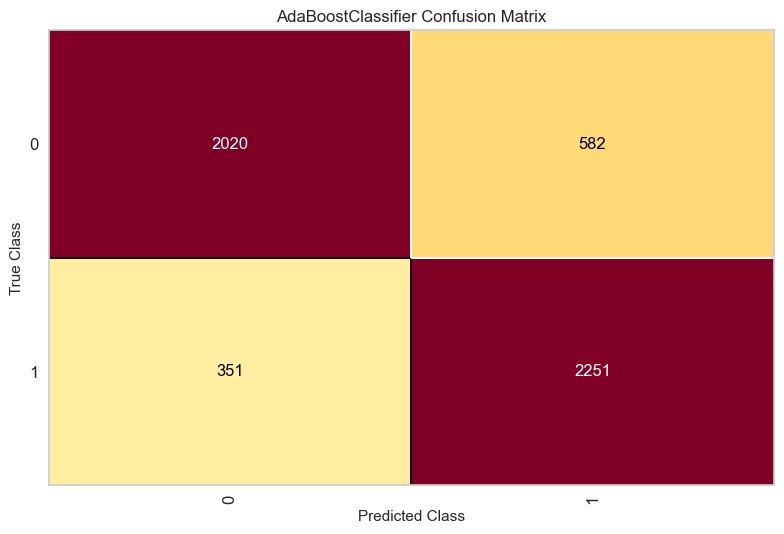

<AxesSubplot: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [123]:
# Model confusion matrix model yang sudah dilakukan oversampling
model_cm = ConfusionMatrix(
    model_tuned_with_oversampling2)

model_cm.fit(x_resampled, y_resampled)
model_cm.score(x_resampled, y_resampled)
model_cm.show()

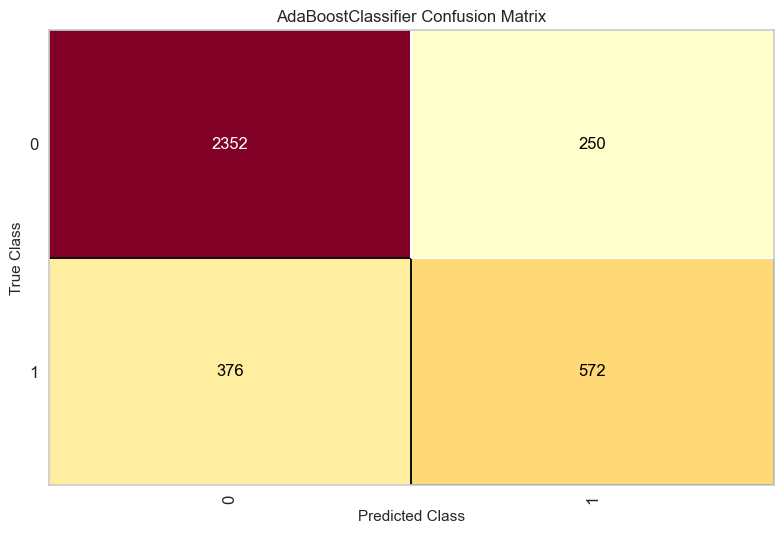

<AxesSubplot: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [124]:
# Model confusion matrix model yang belum dilakukan oversampling
model_cm = ConfusionMatrix(
    model_tuned_without_oversampling2)

model_cm.fit(x_train, y_train)
model_cm.score(x_train, y_train)
model_cm.show()

Terlihat dari tabel confusion martix, **`data train pada model adaboost yang dilakukan oversampling memiliki performa true positive dan true negative lebih baik`** dibandingkan yang tidak dilakukan oversampling

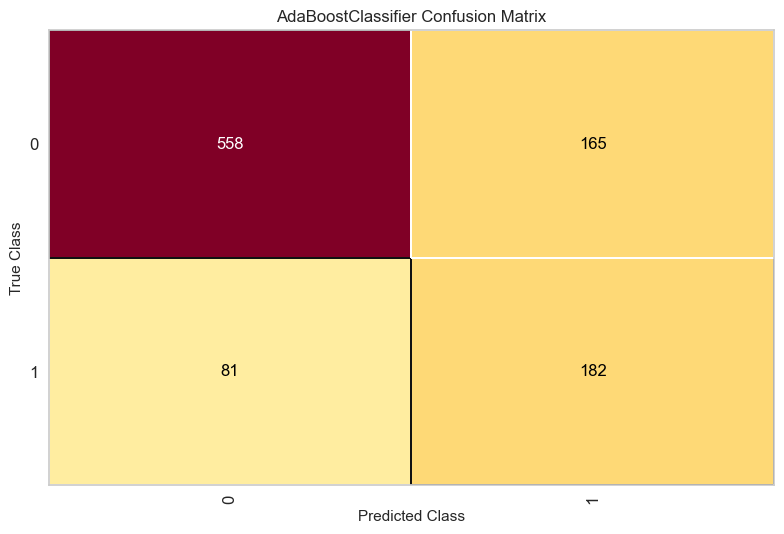

<AxesSubplot: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [125]:
# Model confusion matrix model yang sudah dilakukan oversampling
test_cm = ConfusionMatrix(
    model_tuned_with_oversampling2)

test_cm.fit(x_resampled, y_resampled)
test_cm.score(x_test, y_test)
test_cm.show()

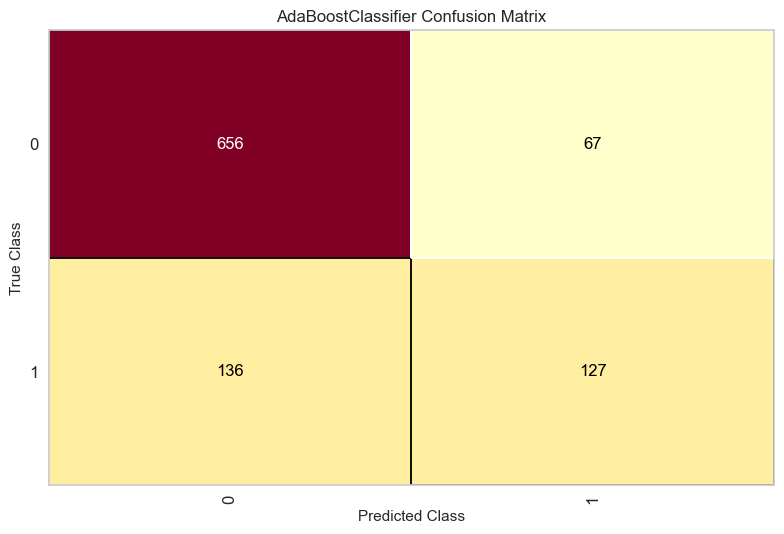

<AxesSubplot: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [126]:
# Model confusion matrix model yang sudah dilakukan oversampling
test_cm = ConfusionMatrix(
    model_tuned_without_oversampling2)

test_cm.fit(x_train, y_train)
test_cm.score(x_test, y_test)
test_cm.show()

**`data test pada model adaboost yang dilakukan oversampling memiliki performa true positive dan true negative lebih baik`** dibandingkan yang tidak dilakukan oversampling.

secara **keseluruhan model yang dilakukan oversampling memiliki performa yang lebih baik** dibandingkan model yang tidak dilakukan oversampling


In [127]:
# Baseline
y_test.value_counts(normalize = True)

0    0.733266
1    0.266734
Name: Churn, dtype: float64

In [128]:
# Metrics yang belum dilakukan oversampling

metrics = {'Baseline': 0.73,'Accuracy_test' :[round(accuracy_score(y_test, model_tuned_without_oversampling2.predict(x_test)), 2)],
          'Recall_train': [round(recall_score(y_train, model_tuned_without_oversampling2.predict(x_train)), 2)],'Recall_test': [round(recall_score(y_test, model_tuned_without_oversampling2.predict(x_test)), 2)], 
          'Precision_train': [round(precision_score(y_train , model_tuned_without_oversampling2.predict(x_train)), 2)],'Precision_test': [round(precision_score(y_test, model_tuned_without_oversampling2.predict(x_test)), 2)], 'Recall_test': [round(recall_score(y_test, model_tuned_without_oversampling2.predict(x_test)), 2)], 
          }
          
df_metrics = pd.DataFrame(data= metrics)
df_metrics

,Baseline,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test
0,0.73,0.79,0.6,0.48,0.7,0.65


In [129]:
# Metrics yang sudah dilakukan oversampling

metrics = {'Baseline': 0.73,'Accuracy_test' :[round(accuracy_score(y_test, model_tuned_with_oversampling2.predict(x_test)), 2)],
          'Recall_train': [round(recall_score(y_resampled, model_tuned_with_oversampling2.predict(x_resampled)), 2)],'Recall_test': [round(recall_score(y_test, model_tuned_with_oversampling2.predict(x_test)), 2)], 
          'Precision_train': [round(precision_score(y_resampled , model_tuned_with_oversampling2.predict(x_resampled)), 2)],'Precision_test': [round(precision_score(y_test, model_tuned_with_oversampling2.predict(x_test)), 2)], 'Recall_test': [round(recall_score(y_test, model_tuned_with_oversampling2.predict(x_test)), 2)], 
          }
          
df_metrics = pd.DataFrame(data= metrics)
df_metrics

,Baseline,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test
0,0.73,0.75,0.87,0.69,0.79,0.52


In [130]:
print(classification_report(y_test, model_tuned_without_oversampling2.predict(x_test))) 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       723
           1       0.65      0.48      0.56       263

    accuracy                           0.79       986
   macro avg       0.74      0.70      0.71       986
weighted avg       0.78      0.79      0.78       986



In [131]:
# Metrics by class
print(classification_report(y_test, model_tuned_with_oversampling2.predict(x_test))) 

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       723
           1       0.52      0.69      0.60       263

    accuracy                           0.75       986
   macro avg       0.70      0.73      0.71       986
weighted avg       0.78      0.75      0.76       986



In [132]:
ada_predict = AdaBoostClassifier().fit(x_train,y_train)
print(classification_report(y_test, ada_predict.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       723
           1       0.68      0.49      0.57       263

    accuracy                           0.80       986
   macro avg       0.75      0.70      0.72       986
weighted avg       0.79      0.80      0.79       986



In [133]:
ada_predict = AdaBoostClassifier().fit(x_resampled,y_resampled)
print(classification_report(y_test, ada_predict.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       723
           1       0.52      0.73      0.61       263

    accuracy                           0.75       986
   macro avg       0.70      0.74      0.71       986
weighted avg       0.79      0.75      0.76       986



In [134]:
y_pred_default_without_oversampling2 = ada_predict.predict(x_test)
y_pred_proba_default_without_oversampling2 = ada_predict.predict_proba(x_test)
y_pred_tuned_without_oversampling2 = model_tuned_without_oversampling2.predict(x_test)
y_pred_proba_tuned_without_oversampling2 = model_tuned_without_oversampling2.predict_proba(x_test)

roc_auc_default_without_oversampling2 = roc_auc_score(y_test, y_pred_proba_default_without_oversampling2[:,1])
roc_auc_tuned_without_oversampling2 = roc_auc_score(y_test, y_pred_proba_tuned_without_oversampling2[:,1])

print('ROC AUC Score Default AdaBoost without oversampling : ', roc_auc_default_without_oversampling2)
print('ROC AUC Score Tuned AdaBoost without oversampling : ', roc_auc_tuned_without_oversampling2)

ROC AUC Score Default AdaBoost without oversampling :  0.834377251523805
ROC AUC Score Tuned AdaBoost without oversampling :  0.8245638946300007


In [135]:
y_pred_default_with_oversampling2 = ada_predict.predict(x_test)
y_pred_proba_default_with_oversampling2 = ada_predict.predict_proba(x_test)
y_pred_tuned_with_oversampling2 = model_tuned_with_oversampling2.predict(x_test)
y_pred_proba_tuned_with_oversampling2 = model_tuned_with_oversampling2.predict_proba(x_test)

roc_auc_default_with_oversampling2 = roc_auc_score(y_test, y_pred_proba_default_with_oversampling2[:,1])
roc_auc_tuned_with_oversampling2 = roc_auc_score(y_test, y_pred_proba_tuned_with_oversampling2[:,1])

print('ROC AUC Score Default AdaBoost with oversampling : ', roc_auc_default_with_oversampling2)
print('ROC AUC Score Tuned AdaBoost with oversampling : ', roc_auc_tuned_with_oversampling2)

ROC AUC Score Default AdaBoost with oversampling :  0.834377251523805
ROC AUC Score Tuned AdaBoost with oversampling :  0.8261600113595129


Terlihat bahwa **`model AdaBoost`** baik yang dilakukan oversampling maupun tidak dilakukan oversampling, **`setelah dilakukan hyperparameter tuning memiliki nilai ROC AUC yang lebih baik`** walaupun hanya naik sedikit saja.

Mari kita lihat juga perbandingan classification reportnya

In [136]:
report_default_without_oversampling2 = classification_report(y_test, y_pred_default_without_oversampling2)
report_tuned_without_oversampling2 = classification_report(y_test, y_pred_tuned_without_oversampling2)

print('Classification Report Default AdaBoost without oversampling : \n', report_default_without_oversampling2)
print('Classification Report Tuned AdaBoost without oversampling : \n', report_tuned_without_oversampling2)

Classification Report Default AdaBoost without oversampling : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       723
           1       0.52      0.73      0.61       263

    accuracy                           0.75       986
   macro avg       0.70      0.74      0.71       986
weighted avg       0.79      0.75      0.76       986

Classification Report Tuned AdaBoost without oversampling : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       723
           1       0.65      0.48      0.56       263

    accuracy                           0.79       986
   macro avg       0.74      0.70      0.71       986
weighted avg       0.78      0.79      0.78       986



In [137]:
report_default_with_oversampling2 = classification_report(y_test, y_pred_default_with_oversampling2)
report_tuned_with_oversampling2 = classification_report(y_test, y_pred_tuned_with_oversampling2)

print('Classification Report Default AdaBoost with oversampling : \n', report_default_with_oversampling2)
print('Classification Report Tuned AdaBoost with oversampling : \n', report_tuned_with_oversampling2)

Classification Report Default AdaBoost with oversampling : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       723
           1       0.52      0.73      0.61       263

    accuracy                           0.75       986
   macro avg       0.70      0.74      0.71       986
weighted avg       0.79      0.75      0.76       986

Classification Report Tuned AdaBoost with oversampling : 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       723
           1       0.52      0.69      0.60       263

    accuracy                           0.75       986
   macro avg       0.70      0.73      0.71       986
weighted avg       0.78      0.75      0.76       986



### Features Impportance

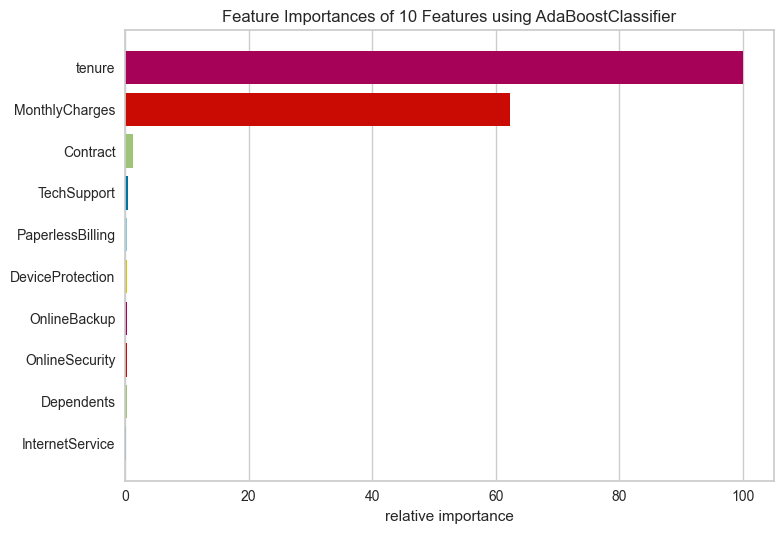

<AxesSubplot: title={'center': 'Feature Importances of 10 Features using AdaBoostClassifier'}, xlabel='relative importance'>

In [138]:
viz = FeatureImportances(model_tuned_with_oversampling)
viz.fit(x_resampled, y_resampled)
viz.show()

In [144]:
pip install shap

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: shap in c:\users\t470\appdata\local\programs\python\python310\lib\site-packages (0.41.0)




[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
import shap

In [146]:
explainer = shap.TreeExplainer(classifier)
#Perhitungan SHAP value, yaitu perhitungan bagaimana setiap fitur berkontribusi kepada prediksi yang dilakukan. Saya secara acak menggambil data di row ke 1
shap_val = explainer.shap_values(x_test.iloc[1])
#Memvisualisasikan pengaruh setiap fitur terhadap prediksi yang dilakukan. Disini dispesifikasikan untuk prediksi class 1 di row ke 1
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_val[1], x_test.iloc[1])

NameError: name 'classifier' is not defined

## **Summary: Model With Oversampling VS Model Without Oversampling**

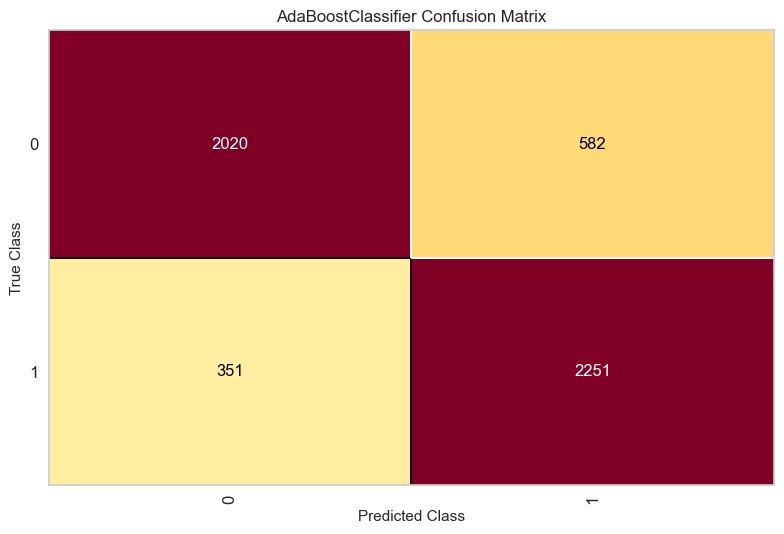

<AxesSubplot: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [139]:
# Model confusion matrix model yang sudah dilakukan oversampling
model_cm_with_oversampling = ConfusionMatrix(
    model_tuned_with_oversampling2)

model_cm_with_oversampling.fit(x_resampled, y_resampled)
model_cm_with_oversampling.score(x_resampled, y_resampled)
model_cm_with_oversampling.show()

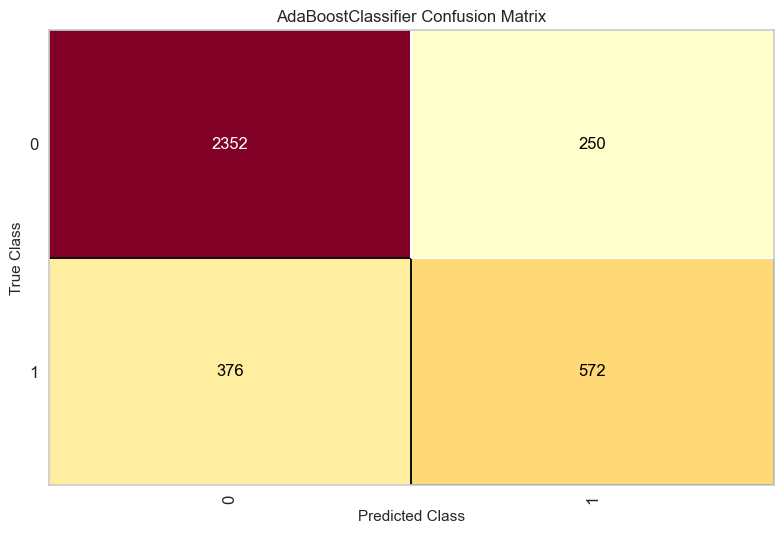

<AxesSubplot: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [140]:
# Model confusion matrix model yang belum dilakukan oversampling
model_cm_without_oversampling = ConfusionMatrix(
    model_tuned_without_oversampling2)

model_cm_without_oversampling.fit(x_train, y_train)
model_cm_without_oversampling.score(x_train, y_train)
model_cm_without_oversampling.show()

In [141]:
print('ROC AUC Score Tuned AdaBoost without oversampling : ', roc_auc_tuned_without_oversampling2)
print('ROC AUC Score Tuned AdaBoost with oversampling : ', roc_auc_tuned_with_oversampling2)

ROC AUC Score Tuned AdaBoost without oversampling :  0.8245638946300007
ROC AUC Score Tuned AdaBoost with oversampling :  0.8261600113595129


In [142]:
print('Classification Report Tuned AdaBoost without oversampling : \n', report_tuned_without_oversampling2)
print('Classification Report Tuned AdaBoost with oversampling : \n', report_tuned_with_oversampling2)

Classification Report Tuned AdaBoost without oversampling : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       723
           1       0.65      0.48      0.56       263

    accuracy                           0.79       986
   macro avg       0.74      0.70      0.71       986
weighted avg       0.78      0.79      0.78       986

Classification Report Tuned AdaBoost with oversampling : 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       723
           1       0.52      0.69      0.60       263

    accuracy                           0.75       986
   macro avg       0.70      0.73      0.71       986
weighted avg       0.78      0.75      0.76       986



**Confusion Matrix :**
- Pada tabel confusion matrix, terlihat bahwa `model yang sudah dilakukan over sampling memiliki performa lebih baik` dibandingkan yang belum dilakukan oversampling. dimana pada model yang telah dilakukan hyperparameter tuning + over sampling memiliki true positive dan true negative yang lebih seimbang (0 = 76%, 1 = 80%) dibandingkan model yang telah dilakukan hyperparameter tuning namun tidak dilakukan over sampling (0 = 90%, 1 = 54%).

**ROC AUC :**
- Dilihat dari nilai ROC AUC, `model yang tidak dilakukan over sampling memiliki nilai yang lebih tinggi` dibandingkan yang belum dilakukan oversampling. Namun, `perbedaannya hanya sedikit saja (0,003874)`. 

**Classification Report :**
- dilihat pada classification report, `model yang dilakukan oversampling + hyperparameter tuning memiliki **nilai recall** yang lebih seimbang` dibanding model yangtidak dilakukan oversampling, namun sudah dilakukan hyperparameter tuning. Selain itu, dapat disimpulkan apabila modle yang digunakan `Tuned AdaBoost with oversampling`, untuk memfilter list pelanggan yang akan coba ditawarkan promo, maka model akan mengurangi 78% pelanggan yang tidak perlu ditawarkan promo agar tetap berlangganan dan dapat mendapatkan 71% pelanggan yang harus ditawarkan promo agar tetap berlangganan
- Model yang dilakukan oversampling + hyperparameter tuning memiliki ketepatan prediksi pelanggan yang churn sebesar 54% (precisionnya), jadi setiap model kita memprediksi bahwa seorang kandidat itu akan meninggalkan layanan, maka kemungkinan tebakannya benar itu sebesar 54% kurang lebih. Maka masih akan ada kandidat yang sebenarnya tidak akan berhenti berlangganan (churn) tetapi diprediksi sebagai kandidat yang akan berhenti langganan (churn) sekitar 22% dari keseluruhan kandidat yang tidak tertarik (berdasarkan recall).


Maka, dapat berdasarkan pertimbangan diatas, model **`AdaBoost yang sudah dilakukan oversampling dan hyperparameter tunning`** memiliki performa yang lebih baik dan dapat **`menjadi model akhir`**. 

### **Rekomendasi**

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Mengambil lebih banyak data lagi untuk meningkatkan keakuratan dan presisi dari model.
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain SMOTE, seperti Random Over Sampling, SMOTEENN, dll.
- Menambahkan fitur-fitur atau kolom baru yang kemungkinan bisa berhubungan dengan tingkat churn, seperti kecepatan rata-rata telekomunikasi, tingkat keseringan pemakaian telekomunikasi, pendapatan pelanggan, jumlah device yang digunakan, dll. 
- Melakukan deployment untuk mengetahui keakuratan dari model. 
- Menganalisa kembali data dari model yang dipilih masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.